1. ***Load and Preview the Data***

In [19]:
import pandas as pd
df = pd.read_csv('AirQualityData.csv')

In [20]:
df.head()

,Date,Time,CO(GT),NOx(GT),NO2(GT),O3(GT),SO2(GT),PM2.5,PM10,Temperature,...,WindDirection,CO_NOx_Ratio,NOx_NO2_Ratio,Temp_Humidity_Index,AirQualityIndex,CO_MA3,NO2_MA3,O3_MA3,DayOfWeek,Hour
0,2024-01-01,00:00,3.807947,172.026768,144.333317,118.120832,1.215679,147.349671,208.803124,28.564580,...,209.984267,0.022008,1.183671,3.541778,343.353046,3.807947,144.333317,118.120832,0,0
1,2024-01-01,01:00,9.512072,241.824266,137.769318,15.325830,1.016178,40.979839,145.595579,6.793192,...,319.534890,0.039173,1.742635,0.727989,206.282028,6.660009,141.051317,66.723331,0,1
2,2024-01-01,02:00,7.346740,228.288118,20.055086,44.377036,24.140910,72.594740,26.155000,24.436552,...,274.644300,0.032042,10.842422,7.378322,140.170920,6.888920,100.719240,59.274566,0,2
3,2024-01-01,03:00,6.026719,47.016072,184.591909,139.488603,2.435392,134.339724,276.367944,26.463951,...,312.266023,0.125515,0.253330,21.684266,307.928588,7.628510,114.138771,66.397156,0,3
4,2024-01-01,04:00,1.644585,45.625591,114.125968,95.634768,48.752095,99.007422,294.295449,10.530331,...,21.392120,0.035272,0.396310,9.627596,370.134556,5.006015,106.257654,93.166802,0,4


In [21]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'NOx(GT)', 'NO2(GT)', 'O3(GT)', 'SO2(GT)',
       'PM2.5', 'PM10', 'Temperature', 'Humidity', 'Pressure', 'WindSpeed',
       'WindDirection', 'CO_NOx_Ratio', 'NOx_NO2_Ratio', 'Temp_Humidity_Index',
       'AirQualityIndex', 'CO_MA3', 'NO2_MA3', 'O3_MA3', 'DayOfWeek', 'Hour'],
      dtype='object')

In [22]:
print(df.shape)

(4000, 23)


2. ***Data Cleaning***

Convert Date and Time into a datetime column (optional but useful)

In [23]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
df.drop(columns=['Date', 'Time'], inplace=True)

In [24]:
df.head()

,CO(GT),NOx(GT),NO2(GT),O3(GT),SO2(GT),PM2.5,PM10,Temperature,Humidity,Pressure,...,CO_NOx_Ratio,NOx_NO2_Ratio,Temp_Humidity_Index,AirQualityIndex,CO_MA3,NO2_MA3,O3_MA3,DayOfWeek,Hour,Datetime
0,3.807947,172.026768,144.333317,118.120832,1.215679,147.349671,208.803124,28.564580,12.399195,1041.659237,...,0.022008,1.183671,3.541778,343.353046,3.807947,144.333317,118.120832,0,0,2024-01-01 00:00:00
1,9.512072,241.824266,137.769318,15.325830,1.016178,40.979839,145.595579,6.793192,10.716451,1045.021361,...,0.039173,1.742635,0.727989,206.282028,6.660009,141.051317,66.723331,0,1,2024-01-01 01:00:00
2,7.346740,228.288118,20.055086,44.377036,24.140910,72.594740,26.155000,24.436552,30.193792,950.441013,...,0.032042,10.842422,7.378322,140.170920,6.888920,100.719240,59.274566,0,2,2024-01-01 02:00:00
3,6.026719,47.016072,184.591909,139.488603,2.435392,134.339724,276.367944,26.463951,81.938885,981.707503,...,0.125515,0.253330,21.684266,307.928588,7.628510,114.138771,66.397156,0,3,2024-01-01 03:00:00
4,1.644585,45.625591,114.125968,95.634768,48.752095,99.007422,294.295449,10.530331,91.427289,1033.737803,...,0.035272,0.396310,9.627596,370.134556,5.006015,106.257654,93.166802,0,4,2024-01-01 04:00:00


In [15]:
print(df.isnull().sum())

CO(GT)                 0
NOx(GT)                0
NO2(GT)                0
O3(GT)                 0
SO2(GT)                0
PM2.5                  0
PM10                   0
Temperature            0
Humidity               0
Pressure               0
WindSpeed              0
WindDirection          0
CO_NOx_Ratio           0
NOx_NO2_Ratio          0
Temp_Humidity_Index    0
AirQualityIndex        0
CO_MA3                 0
NO2_MA3                0
O3_MA3                 0
DayOfWeek              0
Hour                   0
Datetime               0
dtype: int64


In [25]:
df['DayOfWeek'].value_counts()

,count
DayOfWeek,
0,576
1,576
2,576
3,576
4,576
5,568
6,552


3. ***Exploratory Data Analysis (EDA)***

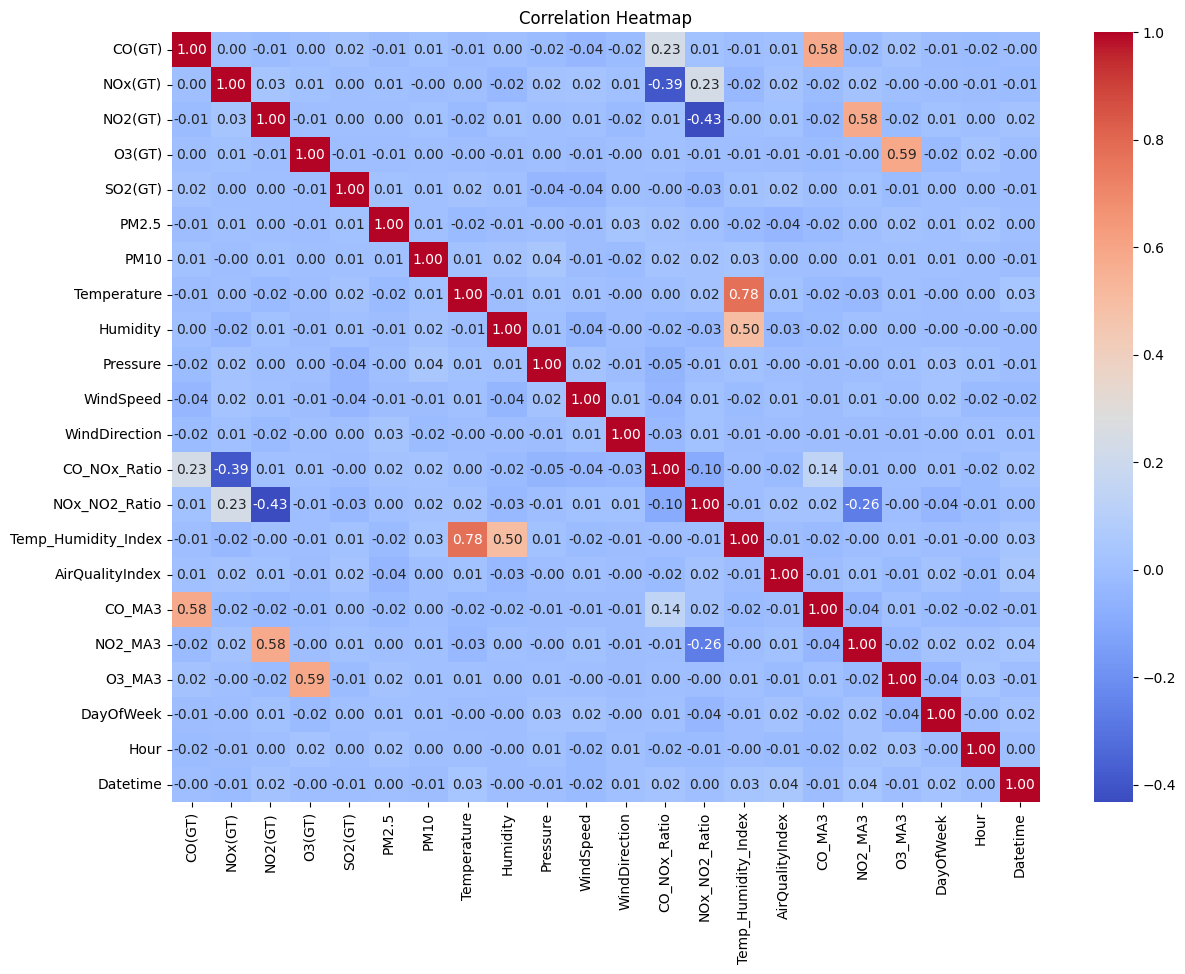

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Distribution of the target variable

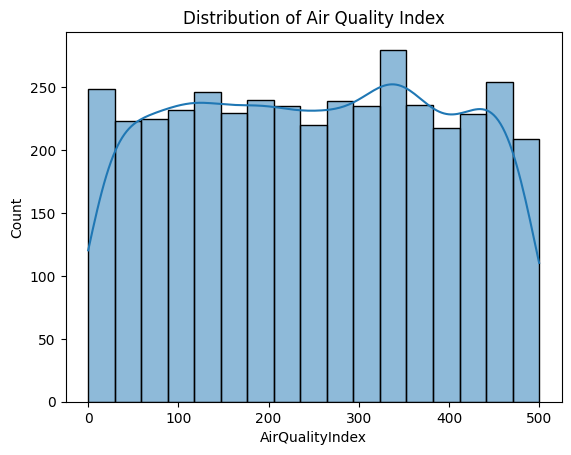

In [27]:
sns.histplot(df['AirQualityIndex'], kde=True)
plt.title("Distribution of Air Quality Index")
plt.show()

4. ***Transformations***

In [28]:
# Example: Log transform skewed features
import numpy as np

skewed_cols = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'O3(GT)', 'SO2(GT)', 'PM2.5', 'PM10']
for col in skewed_cols:
    df[col] = np.log1p(df[col])

5. ***Statistical Tests (Hypothesis Testing)***

In [29]:
from scipy.stats import ttest_ind

# Create Weekend column (Saturday=5, Sunday=6)
df['Weekend'] = df['DayOfWeek'].isin([5, 6])

# Split the CO(GT) values for weekend and weekday
weekend = df[df['Weekend'] == True]['CO(GT)']
weekday = df[df['Weekend'] == False]['CO(GT)']

# Run independent t-test
t_stat, p_value = ttest_ind(weekend, weekday)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -0.18294184974897476, P-value: 0.854852921728993


<ipython-input-30-2b4ab14d16af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Weekend', y='CO(GT)', data=df, palette='pastel')


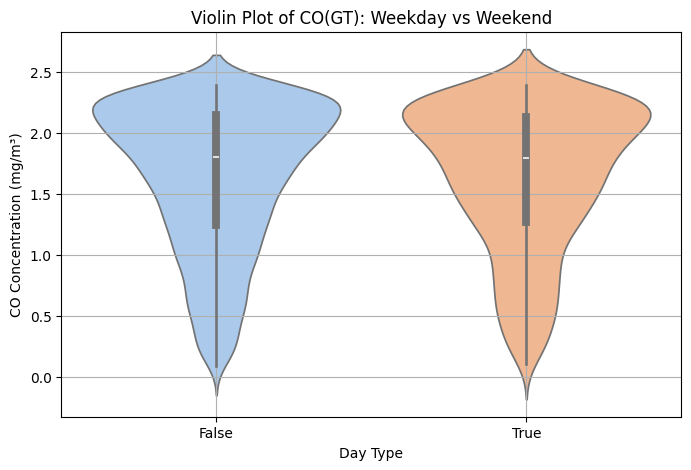

In [30]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Weekend', y='CO(GT)', data=df, palette='pastel')
plt.title('Violin Plot of CO(GT): Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('CO Concentration (mg/m³)')
plt.grid(True)
plt.show()


6. ***Prepare Data for ML***

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop(columns=['AirQualityIndex', 'Datetime', 'DayOfWeek', 'Weekend'])
y = df['AirQualityIndex']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

7. ***Baseline Regressors***

In [34]:
pip install --upgrade scikit-learn

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVM": SVR()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"{name} - RMSE: {rmse:.2f}, R2: {r2:.2f}")

Linear Regression - RMSE: 145.00, R2: -0.01
Random Forest - RMSE: 146.15, R2: -0.03
Gradient Boosting - RMSE: 146.07, R2: -0.03
Decision Tree - RMSE: 209.63, R2: -1.12
SVM - RMSE: 144.12, R2: -0.00


8. ***Artificial Neural Network (ANN)***

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
ann = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

ann.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = ann.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                  epochs=100, batch_size=32)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 84072.4297 - mae: 251.1731 - val_loss: 77955.4844 - val_mae: 239.4479
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71441.4844 - mae: 226.6060 - val_loss: 49469.2109 - val_mae: 183.0000
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 40215.3789 - mae: 164.5976 - val_loss: 24665.2617 - val_mae: 133.2035
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 22159.9961 - mae: 126.1892 - val_loss: 22434.5703 - val_mae: 128.4864
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 21462.3359 - mae: 125.2173 - val_loss: 22169.4707 - val_mae: 127.9036
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 20779.9492 - mae: 123.0655 - val_loss: 22028.0645 - val_mae: 127.5055
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 20676.9180 - mae: 122.5903 - val_loss: 21940.7129 - val_mae: 127.2527
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21333.2188 - mae: 125.3424 - val_l

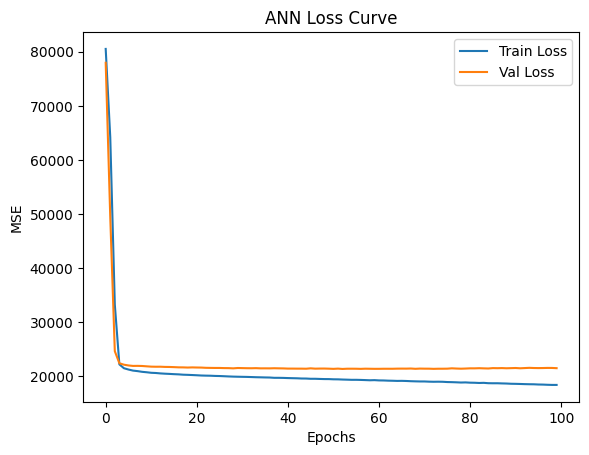

In [39]:
# Plot error curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('ANN Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

9. ***1D CNN + ANN Hybrid***

In [40]:
from tensorflow.keras.layers import Conv1D, Flatten, Input

In [41]:
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

cnn_model = Sequential([
    Input(shape=(X_train_scaled.shape[1], 1)),
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

cnn_history = cnn_model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test),
                            epochs=100, batch_size=32)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 69324.3828 - mae: 222.5169 - val_loss: 22291.9629 - val_mae: 127.9338
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 21805.4727 - mae: 126.8905 - val_loss: 21511.1934 - val_mae: 126.4983
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 21864.4922 - mae: 127.7401 - val_loss: 21379.0020 - val_mae: 126.2134
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 21000.4453 - mae: 124.3060 - val_loss: 21301.1230 - val_mae: 126.0214
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 21139.9785 - mae: 125.4949 - val_loss: 21360.3320 - val_mae: 126.0069
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 20622.5430 - mae: 123.5928 - val_loss: 21246.0352 - val_mae: 125.9083
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 20819.2344 - mae: 124.5559 - val_loss: 21302.3359 - val_mae: 126.0654
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 20279.0273 - mae: 123.

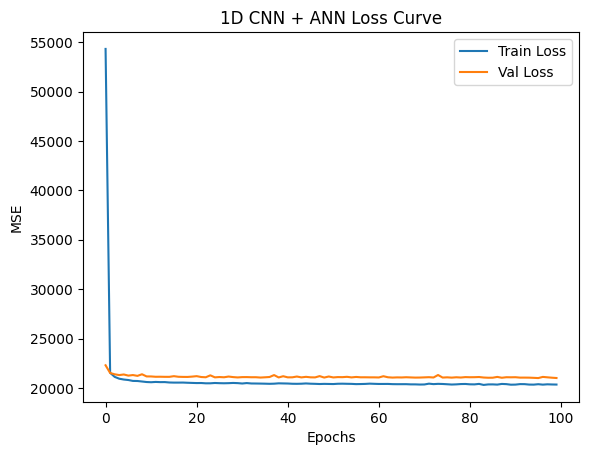

In [42]:
# Plot error curve
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('1D CNN + ANN Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()